# Connection to MYSQL through Python

So the libraries work correctly it is important to get Python 3.7 or below, also the "sqlalchemy" library is not found in Anaconda or Colab therefore is recommended to run this code through cmd.

Some other important tools:

* Xampp
* MySQL
* Qgis

_The used data for this project can be found in the following link:_ [https://drive.google.com/drive/folders/1Tn8qlEOmWxUU51idEdgRfWRM5k35JtA_?usp=sharing]

In [1]:
#Libraries for the MySQL connection
import csv
import pymysql
import pandas as pd
import unicodedata
from sqlalchemy import create_engine, types
import mysql.connector 

#libraries to use the Mapper algorithm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
import sklearn
import datetime as dt 
import scipy.stats as st
import statsmodels.api as sm

#Valente
import io
import sys
import base64
import cv2 as cv
import os
import easygui as gui

from io import StringIO 
from sklearn.preprocessing import LabelEncoder 
#Encode target labels with value between 0 and n_classes-1.
from sklearn.preprocessing import StandardScaler 
#Standardize features by removing the mean and scaling to unit variance.

from sklearn.decomposition import PCA 
#Principal component analysis (PCA).
#Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space. 
#The input data is centered but not scaled for each feature before applying the SVD.

from sklearn.manifold import TSNE
#t-distributed Stochastic Neighbor Embedding. It's a tool to visualize high-dimensional data.

from sklearn import datasets
import umap.umap_ as umap
#Uniform Manifold Approximation and Projection (UMAP) is a dimension reduction technique that can be used for visualisation
#similarly to t-SNE, but also for general non-linear dimension reduction. 

import kmapper as km
from kmapper import jupyter 
#Creates custom CSS full-size Jupyter screen.

from sklearn import preprocessing
#Provides several common utility functions and transformer classes to change raw feature vectors into a representation
#that is more suitable for the downstream estimators.

#Project 
from sklearn import ensemble
from sklearn import manifold

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Testing connection
mydb = mysql.connector.connect( 
  host = "localhost", 
  user = "root", 
  password = "", 
  database = "prueba",
)  
  
mycursor = mydb.cursor() 

INSERTING DATA TO THE DATABASE

* *UBICACIÓN*

In [11]:
engine = create_engine('mysql://root:@localhost/prueba?charset=utf8')
df = pd.read_csv("ubicacion.csv",sep=',',quotechar='\'',encoding='utf8') 
df.to_sql('ubicación',con=engine,index=False,if_exists='append')

* *COVID*

In [4]:
engine = create_engine('mysql://root:@localhost/prueba?charset=utf8')
df = pd.read_csv("ProcessedHgo.csv",sep=',',quotechar='\'',encoding='utf-8')
df.to_sql('DatosCovid',con=engine,index=False,if_exists='append')

* _OTROS DATOS_

In [11]:
queryframe =  pd.read_sql("""
           SELECT NOM_MUN, LON_DECIMAL,LAT_DECIMAL,  count(NOM_MUN) as TotalCases
           FROM datoscovid6 WHERE UCI = 1 AND SEXO=2
           GROUP BY NOM_MUN;
            """, con = mydb)
# SELECT NOM_MUN,LON_DECIMAL,LAT_DECIMAL, COUNT(NOM_MUN) as TotalCases
#           FROM datoscovid WHERE FECHA_DEF != '9999-99-99'
#          GROUP BY NOM_MUN;
#EDAD,TIPO_PACIENTE, NEUMONIA, DIABETES, EPOC, ASMA, INMUSUPR, HIPERTENSION,
#           OTRA_COM, CARDIOVASCULAR, OBESIDAD, OTRO_CASO, UCI, CLASIFICACION_FINAL,

# Return the first five rows
queryframe.head()

,NOM_MUN,LON_DECIMAL,LAT_DECIMAL,TotalCases
0,Colima,-103.728119,19.242922,7
1,Cuauhtémoc,-103.601861,19.328774,1
2,Ixtlahuacán,-103.738593,19.001184,1
3,Manzanillo,-104.316381,19.053206,44
4,Tecomán,-103.873789,18.910604,6


In [12]:
queryframe.to_csv('C:/Users/almej/Desktop/TotalCasesUCIMujColima.csv')

<AxesSubplot:xlabel='TotalCases', ylabel='Density'>

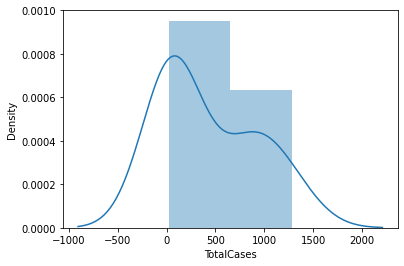

In [22]:
#histogram
sns.distplot(queryframe['TotalCases'])

<AxesSubplot:xlabel='UCI', ylabel='Density'>

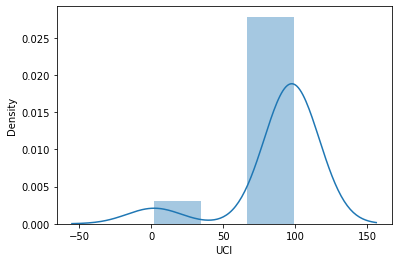

In [23]:
#histogram
sns.distplot(queryframe['UCI'])

<AxesSubplot:xlabel='CLASIFICACION_FINAL', ylabel='Density'>

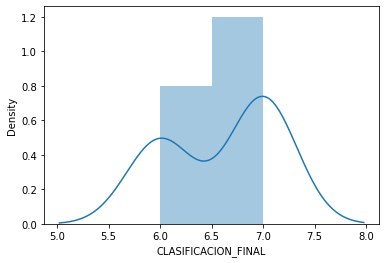

In [24]:
#histogram
sns.distplot(queryframe['CLASIFICACION_FINAL'])

<AxesSubplot:xlabel='TIPO_PACIENTE', ylabel='Density'>

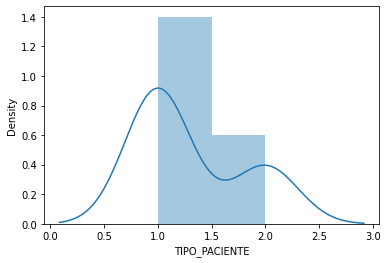

In [25]:
#histogram
sns.distplot(queryframe['TIPO_PACIENTE'])

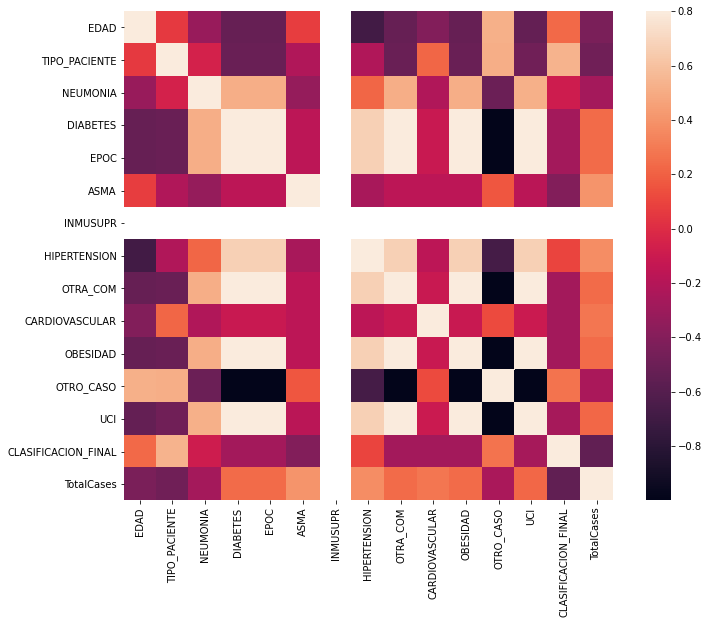

In [26]:
corrmat = queryframe.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

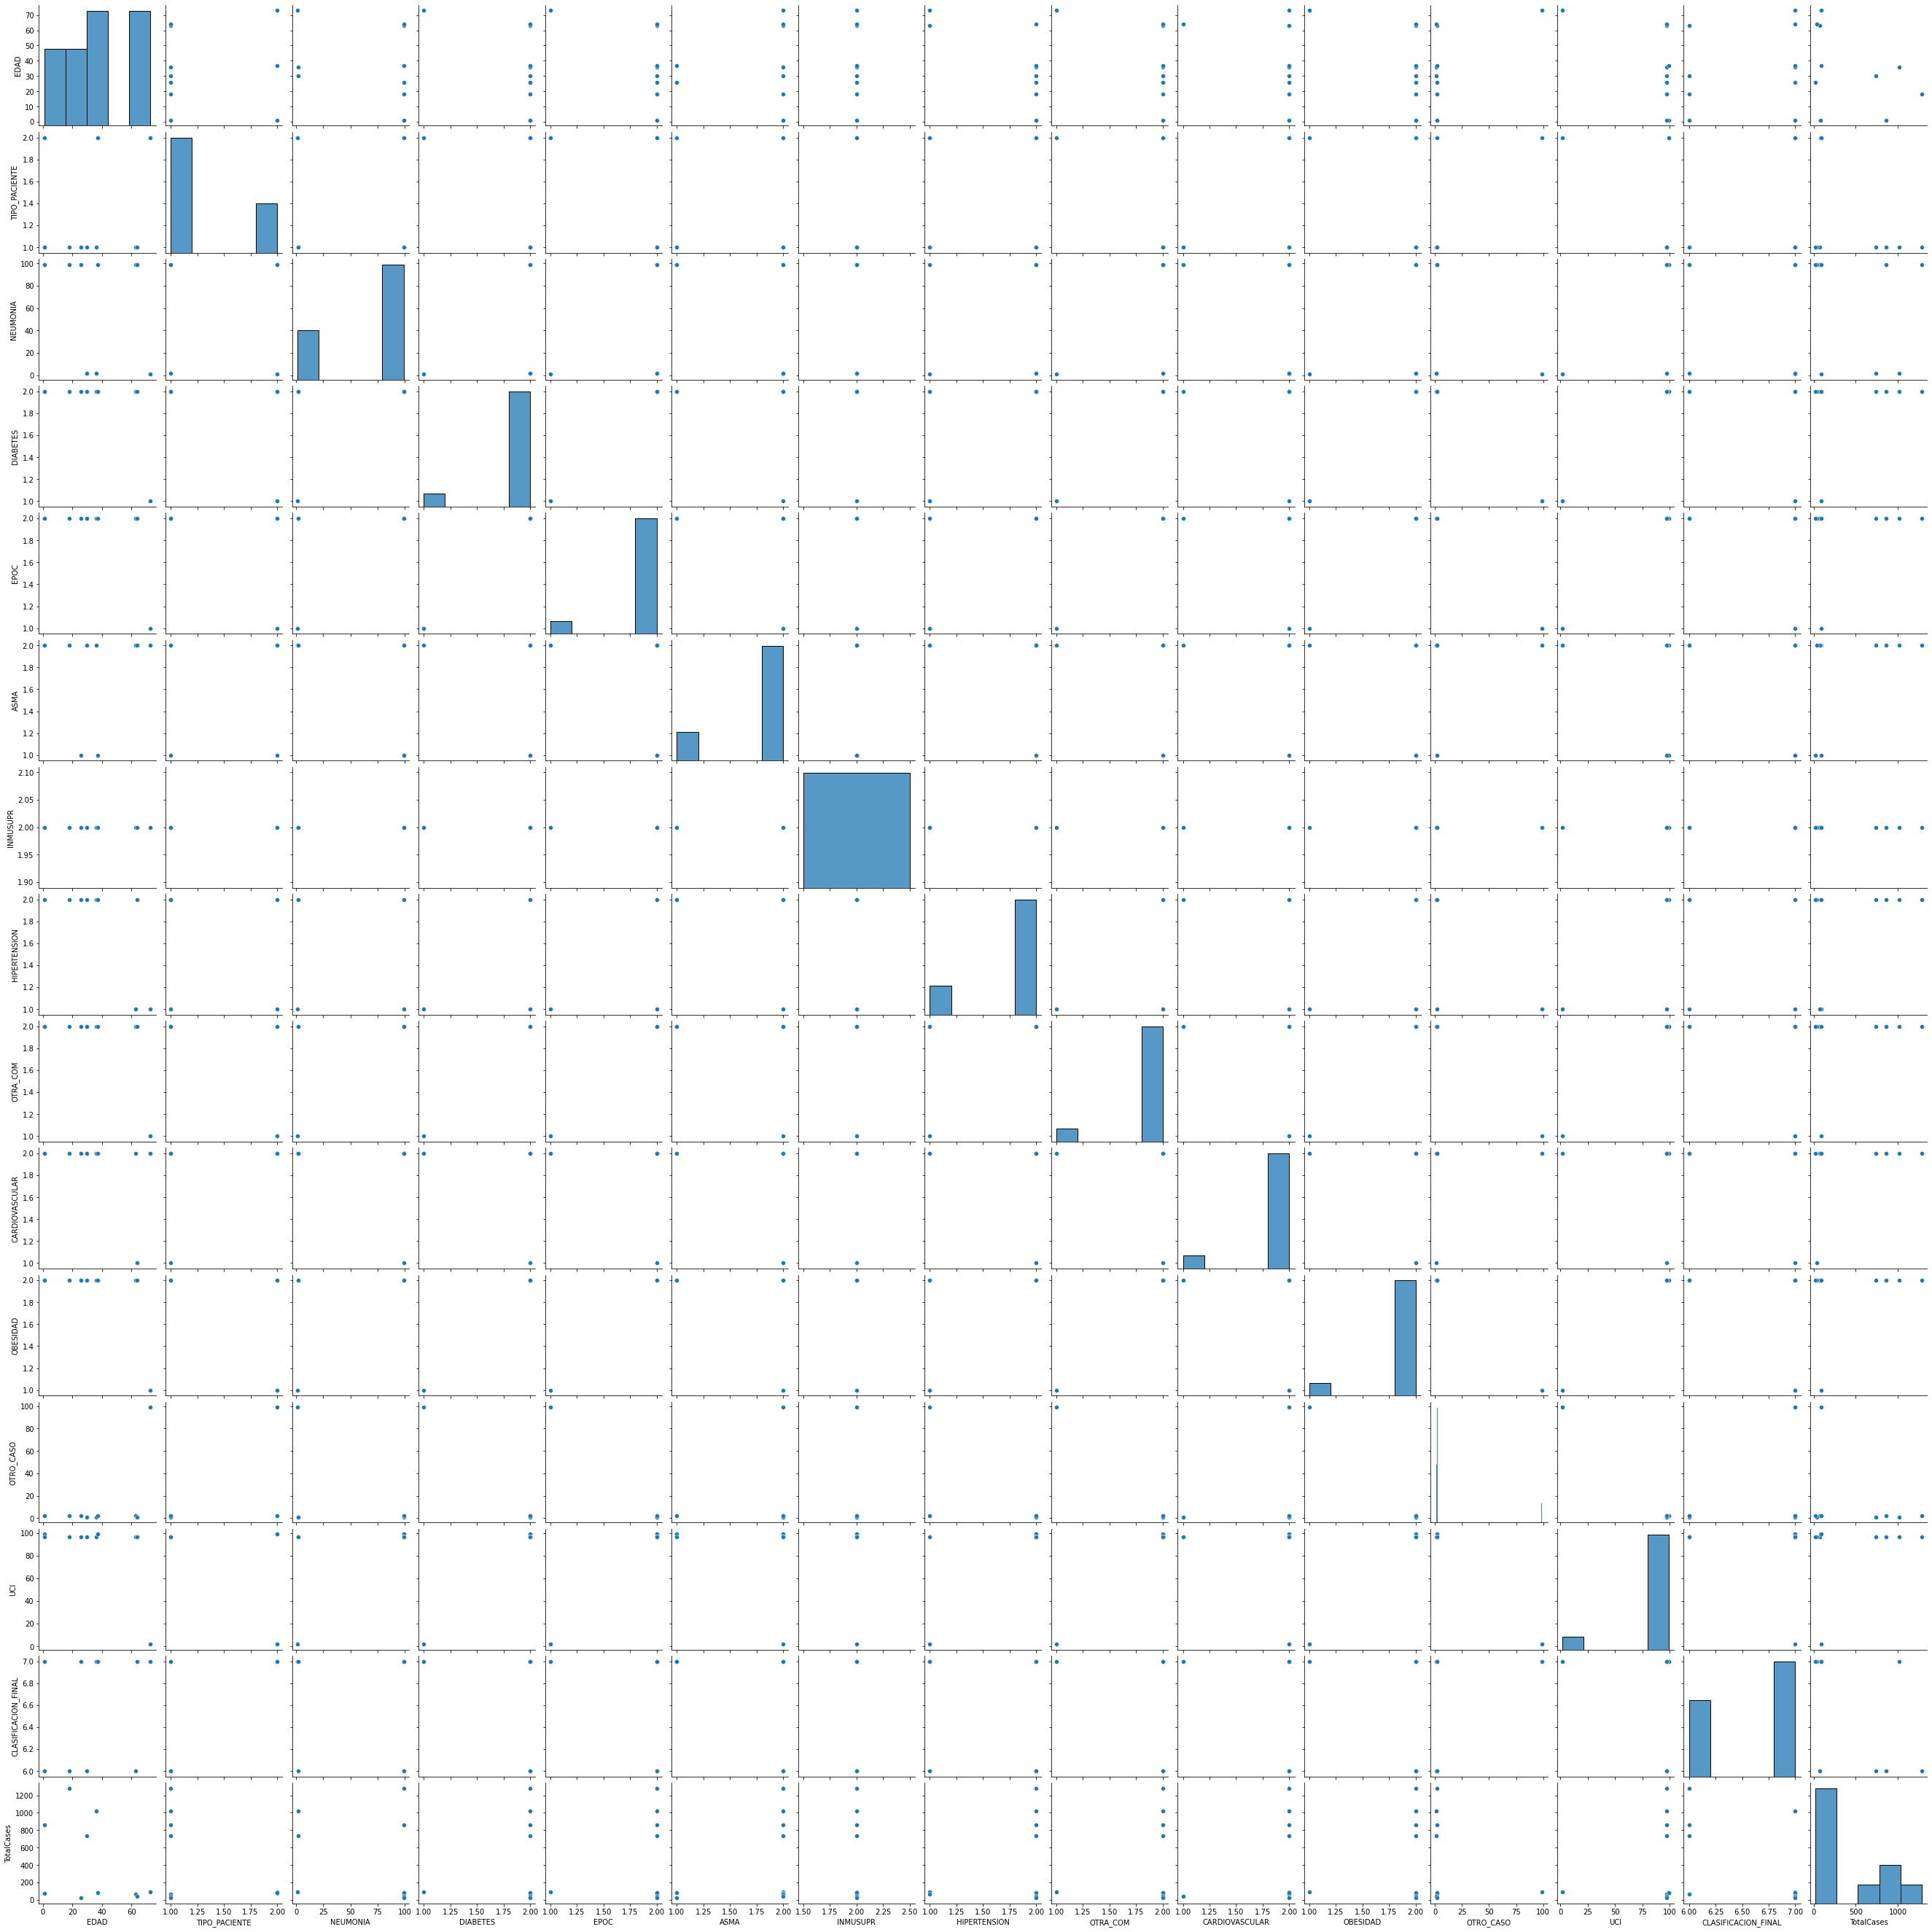

In [27]:
sns.pairplot(data=queryframe)

In [28]:
#variable dependiente duracion
corr = queryframe.corr()
print(corr)

                         EDAD  TIPO_PACIENTE  NEUMONIA  DIABETES      EPOC  \
EDAD                 1.000000       0.057179 -0.313787 -0.528209 -0.528209   
TIPO_PACIENTE        0.057179       1.000000 -0.050880 -0.509175 -0.509175   
NEUMONIA            -0.313787      -0.050880  1.000000  0.514149  0.514149   
DIABETES            -0.528209      -0.509175  0.514149  1.000000  1.000000   
EPOC                -0.528209      -0.509175  0.514149  1.000000  1.000000   
ASMA                 0.070705      -0.218218 -0.327321 -0.166667 -0.166667   
INMUSUPR                  NaN            NaN       NaN       NaN       NaN   
HIPERTENSION        -0.688336      -0.218218  0.221951  0.666667  0.666667   
OTRA_COM            -0.528209      -0.509175  0.514149  1.000000  1.000000   
CARDIOVASCULAR      -0.403435       0.218218 -0.218214 -0.111111 -0.111111   
OBESIDAD            -0.528209      -0.509175  0.514149  1.000000  1.000000   
OTRO_CASO            0.522735       0.514097 -0.504159 -0.999883

st.chisqprob = lambda chisq, df: st.chi2.sf(chisq, df)
cols=queryframe_constant.columns[:-1]
model=sm.Logit(queryframe.const,queryframe_constant[cols])
result=model.fit()
result.summary()

In [30]:
#Empezamos regresión lineal con machine learning
X = queryframe[['EDAD', 'TIPO_PACIENTE', 'HIPERTENSION', 'OTRA_COM', 'CARDIOVASCULAR', 'OBESIDAD', 'OTRO_CASO', 'UCI']]
y = queryframe['CLASIFICACION_FINAL']

In [31]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X,y)

LinearRegression()

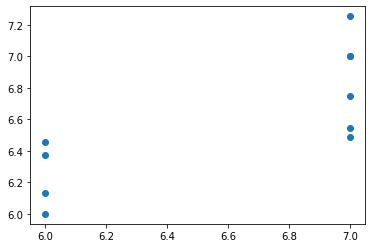

In [32]:
predictions = lm.predict(X)
plt.scatter(y,predictions)

In [33]:
queryframe = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient']) 
queryframe

,Coefficient
EDAD,0.014113
TIPO_PACIENTE,0.440273
HIPERTENSION,1.010753
OTRA_COM,-0.008202
CARDIOVASCULAR,-0.062500
OBESIDAD,-0.008202
OTRO_CASO,0.087366
UCI,0.084971


In [34]:
#Error
df_predictions = pd.DataFrame({'Actual': y, 'Predicted': predictions})
df_predictions['error'] = df_predictions['Actual'] - df_predictions['Predicted']
df_predictions['error'].mean()

-3.552713678800501e-16

In [35]:
from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y, predictions)
print(r2)

0.596214157706094


* SELECTING DATA

In [18]:
#Code to check whether the query is executed successfully or not
''' mycursor.execute("SELECT latitud,longitud FROM covid")
myresult = mycursor.fetchall()
for x in myresult:
  print(x)  '''

# Read the SQL query results using pandas
queryframe = pd.read_sql("""
            SELECT Lon_Decimal, Lat_Decimal, Altitud FROM Hidalgo_municipios LIMIT 10;
            """, con = mydb)

# Return the first five rows
queryframe.head()



,Lon_Decimal,Lat_Decimal,Altitud
0,-98.438372,20.145903,2130
1,-98.203244,20.158693,2255
2,-98.942901,20.269086,2003
3,-98.356386,20.349504,2183
4,-99.122133,20.092525,2143


In [19]:
queryframe.columns

Index(['Lon_Decimal', 'Lat_Decimal', 'Altitud'], dtype='object')

In [20]:
queryframe.describe()

,Lon_Decimal,Lat_Decimal,Altitud
count,10.000000,10.000000,10.000000
mean,-98.740004,20.111958,2171.900000
std,0.413942,0.239669,206.980112
min,-99.349589,19.703319,1870.000000
25%,-99.077325,20.067497,2044.500000
50%,-98.681495,20.152298,2136.500000
75%,-98.412063,20.257170,2237.000000
max,-98.203244,20.409971,2531.000000


In [21]:
queryframe.shape

(10, 3)

* _CASOS TOTALES_

In [61]:
queryframeTotales = pd.read_sql("""
            SELECT h.Cve_Mun, h.Nom_mun,h.Nom_Loc,h.Lat_Decimal,h.Lon_Decimal, COUNT(c.MUNICIPIO_RES) AS Cases
              FROM hidalgo_municipios h INNER JOIN datoscovidbc c
              ON h.Cve_Mun = c.MUNICIPIO_RES
              GROUP BY h.Nom_mun
              ORDER BY COUNT(c.MUNICIPIO_RES) DESC;
            """, con = mydb)

# Return the first five rows
queryframeTotales.head()

,Cve_Mun,Nom_mun,Nom_Loc,Lat_Decimal,Lon_Decimal,Cases
0,2,Acaxochitlán,Acaxochitlán,20.158693,-98.203244,16266
1,4,Agua Blanca de Iturbide,Agua Blanca de Iturbide,20.349504,-98.356386,15116
2,1,Acatlán,Acatlán,20.145903,-98.438372,3908
3,3,Actopan,Actopan,20.269086,-98.942901,931
4,5,Ajacuba,Ajacuba,20.092525,-99.122133,818


In [62]:
queryframeTotales.to_csv('C:/Users/almej/Desktop/Totalesbc.csv')

* VISUALIZING THE DATAFRAME